In [1]:
import os
import numpy as np
from keras.applications import ResNet50V2
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\idong\Anaconda3\envs\tens_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\idong\Anaconda3\envs\tens_gpu

In [2]:
base_dir = r'D:\dataset\dental\data'

data = np.load(base_dir + "\\data_ff.npy")
label = np.load(base_dir + "\\labels_angle_class_face.npy")

In [3]:
conv_base = ResNet50V2(weights = 'imagenet',
                       #classfier를 삭제함!
                 include_top = False,
                 input_shape = (299, 299, 3))

* model3 = conv_base를 4개 동결 해제 시킨 후 학습시킨 모델

In [4]:
#메모리 사용량은 batch size와 모델의 복잡성
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten(input_shape=(10,10,2048)))
model3.add(layers.Dense(128, activation='relu', input_dim=(10*10*2048)))
model3.add(layers.Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 10, 10, 2048)      23564800  
_________________________________________________________________
flatten_1 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               26214528  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 49,779,715
Trainable params: 49,734,275
Non-trainable params: 45,440
_________________________________________________________________


In [4]:
conv_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 152, 152, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

* 'conv5_block3_3_conv' 가 나오기 전까지 동결됨

In [5]:
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'conv5_block3_3_conv':
         set_trainable = True
    layer.trainable = set_trainable

In [6]:
len(conv_base.trainable_weights)

4

In [7]:
train_data3, test_data3, train_label3, test_label3= train_test_split(data, label, test_size = 0.2, random_state = 123)
train_data3, val_data3, train_label3, val_label3 = train_test_split(train_data3, train_label3, test_size = 0.2, random_state = 123)

In [8]:
#원 핫 인코딩을 위해 label을 바꿈
one_hot_train_labels = to_categorical(train_label3 - 1)
one_hot_validation_labels = to_categorical(val_label3 - 1)
one_hot_test_labels = to_categorical(test_label3 - 1)

In [9]:
model3.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [10]:
# Train model
history = model3.fit(train_data3, one_hot_train_labels,
                    epochs=150,
                    batch_size=40, 
                    validation_data=(val_data3, one_hot_validation_labels))


Train on 183 samples, validate on 46 samples
Epoch 1/150
183/183 [==============================] - 10s 56ms/step - loss: 20.4611 - acc: 0.3825 - val_loss: 1.8331 - val_acc: 0.3261
Epoch 2/150
183/183 [==============================] - 3s 14ms/step - loss: 1.1750 - acc: 0.7705 - val_loss: 1.6331 - val_acc: 0.3696
Epoch 3/150
183/183 [==============================] - 3s 15ms/step - loss: 0.3049 - acc: 0.8962 - val_loss: 1.5876 - val_acc: 0.3478
Epoch 4/150
183/183 [==============================] - 3s 15ms/step - loss: 0.0696 - acc: 0.9727 - val_loss: 2.4562 - val_acc: 0.3913
Epoch 5/150
183/183 [==============================] - 3s 15ms/step - loss: 0.0468 - acc: 0.9781 - val_loss: 2.3418 - val_acc: 0.3913
Epoch 6/150
183/183 [==============================] - 3s 15ms/step - loss: 0.0102 - acc: 1.0000 - val_loss: 2.0173 - val_acc: 0.3913
Epoch 7/150
183/183 [==============================] - 3s 15ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 1.7975 - val_acc: 0.4130
Epoch 8/150
18

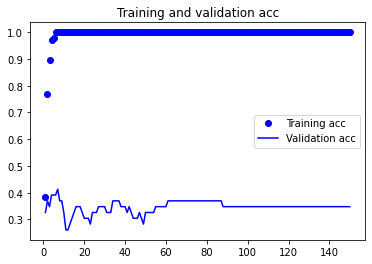

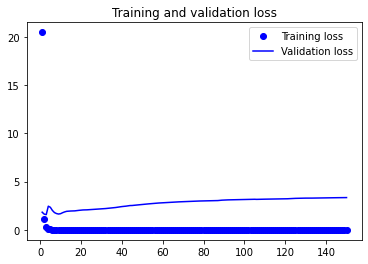

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_h = range(1, len(acc) + 1)

plt.plot(epochs_h, acc, 'bo', label='Training acc')
plt.plot(epochs_h, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs_h, loss, 'bo', label='Training loss')
plt.plot(epochs_h, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()